In [8]:
import tensorflow as tf
import layers as ly
import numpy as np

x=tf.placeholder(tf.float32,shape=[None,784])
y_=tf.placeholder(tf.float32, shape=[None,10])

x_image=tf.reshape(x,[-1,28,28,1])
conv1=ly.conv_layer(x_image,shape=[5,5,1,32])
conv1_pool=ly.max_pool_2x2(conv1)

conv2=ly.conv_layer(conv1_pool,shape=[5,5,32,64])
conv2_pool=ly.max_pool_2x2(conv2)

conv2_flat=tf.reshape(conv2_pool,[-1,7*7*64])
full_1=tf.nn.relu(ly.full_layer(conv2_flat,1024))

keep_pb=tf.placeholder(tf.float32)
full1_drop=tf.nn.dropout(full_1,keep_prob=keep_pb)

y_conv=ly.full_layer(full1_drop,10)

In [42]:
from tensorflow.examples.tutorials.mnist import input_data

DATA_DIR='data'
mnist=input_data.read_data_sets(DATA_DIR,one_hot=True)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [43]:
STEPS=1000
BATCH_SIZE=50

cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv,labels=y_))
train_step=tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction=tf.equal(tf.argmax(y_conv,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


In [45]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(STEPS):
        batch=mnist.train.next_batch(BATCH_SIZE)
        if i%100==0:
            train_accuracy=sess.run(accuracy,feed_dict={x:batch[0],y_:batch[1],keep_pb:1.0})
            print("step {}, training accuracy {}".format(i,train_accuracy))
        sess.run(train_step,feed_dict={x:batch[0],y_:batch[1],keep_pb:0.5})
    X=mnist.test.images.reshape(10,1000,784)
    Y=mnist.test.labels.reshape(10,1000,10)
    test_accuracy=np.mean([sess.run(accuracy,feed_dict={x:X[j],y_:Y[j],keep_pb:1.0}) for j in range(10)])
    print("test accuracy : {}".format(test_accuracy))

step 0, training accuracy 0.14000000059604645
step 100, training accuracy 0.8799999952316284
step 200, training accuracy 0.9200000166893005
step 300, training accuracy 0.9399999976158142
step 400, training accuracy 0.9399999976158142
step 500, training accuracy 0.9800000190734863
step 600, training accuracy 0.9599999785423279
step 700, training accuracy 0.9200000166893005
step 800, training accuracy 1.0
step 900, training accuracy 0.8999999761581421
test accuracy : 0.9634000062942505


In [3]:
from cifar_cnn import get_CIFAR10_data

data_dict=get_CIFAR10_data()
print("Number of train images: {}".format(len(data_dict['X_train'])))
print("Number of train images: {}".format(len(data_dict['y_train'])))
print("Number of train images: {}".format(len(data_dict['X_test'])))
print("Number of train images: {}".format(len(data_dict['y_test'])))
images=data_dict['X_train']
print(images[0].shape)

Number of train images: 49000
Number of train images: 49000
Number of train images: 1000
Number of train images: 1000


In [30]:
print(images[0].shape)
x=tf.placeholder(tf.float32,shape=[None,3,32,32])

(3, 32, 32)


(3, 320, 32)
(3, 320, 320)


TypeError: Invalid dimensions for image data

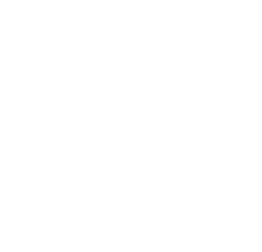